#Preliminary operations

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=4cfa22ebf3facea1bbc6689763a814d7db74b629da8deba2dc8630346070fe80
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod


In [3]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_data = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Data Understanding and Preparation/DATASET PREPARED/df_prep_TRAIN.xlsx", index_col="Unnamed: 0")
df_info = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Data Understanding and Preparation/DATASET PREPARED/df_prep_info_TRAIN.xlsx", index_col="Unnamed: 0")

In [9]:
X = df_data.values

In [5]:
df_data.head()

,sum,std,q25,q50,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,0.604904,-1.113727,1.155846,-0.064505,0.746422,1.597947,0.032809,0.526054,0.663058,-1.434221,...,-0.583254,-1.515480,-0.248903,-0.405919,3.146246,-1.505367,0.202942,1.325865,0.035922,3.971428
1,0.565092,-1.067513,1.155846,-0.064505,0.941449,1.648120,0.032809,0.186319,0.920248,-1.261744,...,-0.816861,-0.814428,0.141589,-0.408215,-0.236257,-0.713717,-0.120760,0.953175,0.035922,-0.381447
2,0.610689,-0.946842,1.891250,-0.064505,1.011526,1.770978,-0.885806,0.614675,0.111653,-1.673729,...,-0.514856,-1.120598,-0.095555,-0.227969,2.741296,-1.301205,-0.232259,1.008646,0.035922,2.877028
3,0.598277,-0.975367,1.155846,-0.064505,1.569306,1.970460,-0.696296,0.565900,0.856282,-1.352954,...,-0.059808,-0.706300,-0.404156,-0.535901,-0.469754,-0.612675,-0.537815,0.888896,0.035922,-0.307128
4,0.595865,-1.306279,1.155846,-0.064505,0.488840,1.426924,-0.696296,0.269613,0.151788,-1.499722,...,-0.503638,-0.784317,0.042496,-0.230801,0.600646,-0.701060,0.212217,0.950638,0.035922,1.797345


In [6]:
df_info.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152
4,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769


# ABOD

In [7]:
from pyod.models.abod import ABOD

In [10]:
clf = ABOD()
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [11]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1581,  247]))

In [12]:
outliers = clf.predict(X)
index = df_data.index
prob = clf.decision_scores_

listatotale = []
for i, j in zip(index,prob):
  listatotale.append((i, j))

In [13]:
len(listatotale)

1828

In [14]:
sorted(
    listatotale, 
    key=lambda x: x[1],
    reverse=True
)[:18]

[(942, -4.164719970750772e-12),
 (382, -4.447594915395049e-08),
 (1702, -1.0794084452435365e-07),
 (1765, -1.4647384089719082e-07),
 (292, -1.5080273604252428e-07),
 (251, -1.63707569097732e-07),
 (826, -1.7098801242698575e-07),
 (294, -1.7170305095509218e-07),
 (1752, -1.726669120425238e-07),
 (771, -1.7801595138368266e-07),
 (458, -1.8558374455510053e-07),
 (832, -1.8774749407142593e-07),
 (250, -2.0639968317319196e-07),
 (1756, -2.2539168290920082e-07),
 (1204, -2.2558036736531265e-07),
 (1759, -2.608719413436313e-07),
 (295, -2.702283704419243e-07),
 (1241, -2.883858976079953e-07)]

In [ ]:
for i, x in enumerate(outliers):
  if x == 1:
    print(i)

In [16]:
outliers_1 = np.zeros(1828)

In [17]:
outliers_1

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
for i in[
    942,
    382,
    1702,
    1765,
    292,
    251,
    826,
    294,
    1752,
    771,
    458,
    832,
    250,
    1756,
    1204,
    1759,
    295,
    1241]:
    outliers_1[i]= 1

#Dimensionality Reduction

##PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [44]:
X_train_pca.shape

(1828, 2)

In [45]:
import matplotlib.pyplot as plt

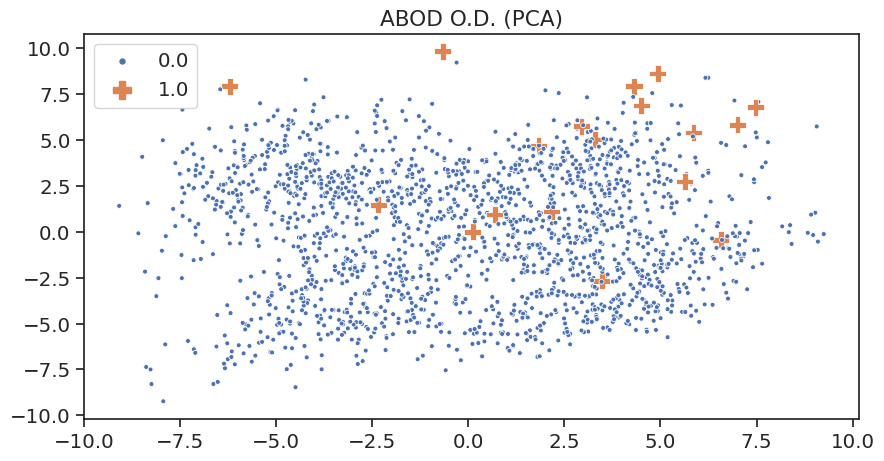

In [46]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_pca,
    x = X_train_pca[:, 0],
    y = X_train_pca[:, 1],
    size=outliers_1, 
    hue=outliers_1,
    sizes=(150, 50), 
    legend="full",
    style=outliers_1,
    markers={0:".", 1:"P"}
).set(title="ABOD O.D. (PCA)")

plt.savefig("ABOD_PCA.pdf", format="pdf")

## Random Subspace Projection

In [47]:
from sklearn import random_projection

In [48]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

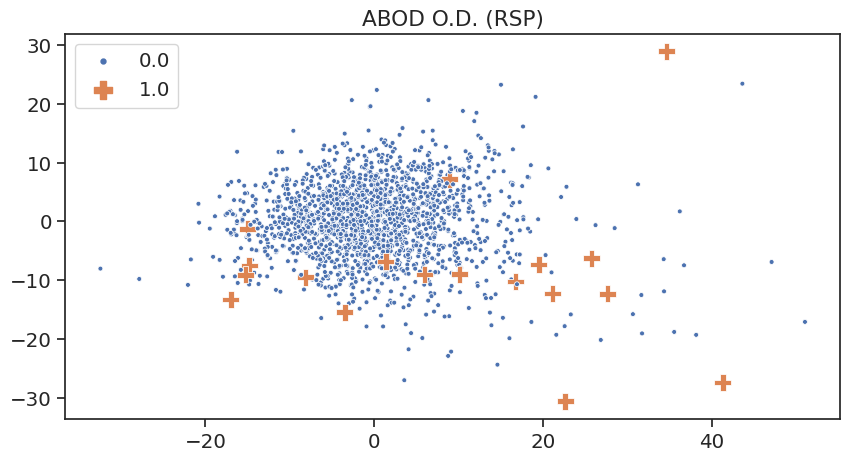

In [49]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_pca,
    x = X_train_rsp[:, 0],
    y = X_train_rsp[:, 1],
    size=outliers_1, 
    hue=outliers_1,
    sizes=(150, 50), 
    legend="full",
    style=outliers_1,
    markers={0:".", 1:"P"}
).set(title="ABOD O.D. (RSP)")

plt.savefig("ABOD_RSP.pdf", format="pdf")